## 1. 문장 토큰화(Sentence Tokenization)
아래 내용은 코퍼스를 문장 단위로 토큰화하는 코드입니다.

In [ ]:
%pip install nltk

In [ ]:
# 필요한 패키지와 함수 불러오기
from nltk.tokenize import sent_tokenize

In [ ]:
import nltk
nltk.download('punkt')

text = "My email address is 'abcde@codeit.com'. Send it to Mr.Kim."

# 문장 토큰화
tokenized_sents = sent_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# 결과 출력
print(tokenized_sents)

["My email address is 'abcde@codeit.com'.", 'Send it to Mr.Kim.']


문장이 끝나는 지점의 마침표를 기준으로 토큰화가 잘 되었습니다. 그런데, abcde@codeit.com의 마침표와 Mr.Kim의 마침표는 문장을 나누는 지점으로 인식하지 않았네요. 앞에서 punkt 모듈을 설치하면 마침표나 약어(Mr. , Dr.)와 같은 언어적인 특성을 고려해서 문장 토큰화가 됐었죠? 덕분에 단순히 마침표가 있는 곳을 문장으로 나누는 것이 아니라 실제 문장을 잘 구분해 준 것이죠.

마침표 외에도 느낌표, 물음표 등이 문장을 나누는 기준이 될 수 있는데요. 아래 예시를 확인해 주세요.

In [ ]:
text = "Can you forward my email to Mr.Kim? Thank you!"

tokenized_sents = sent_tokenize(text)

print(tokenized_sents)

['Can you forward my email to Mr.Kim?', 'Thank you!']


## 2. 문장 토큰화 실습
text.py 파일에 있는 코퍼스 TEXT를 불러와서 문장 단위로 토큰화해 주세요.

In [ ]:
# Codeit에서는 from text import TEXT 모듈을 사용했지만. Colab 환경에서 부르는 방법을 몰라서 파일 내용 그래도 복사해옴
corpus = """After reading the comments for this movie, I am not sure whether I should be angry, sad or sickened. Seeing comments typical of people who a)know absolutely nothing about the military or b)who base everything they think they know on movies like this or on CNN reports about Abu-Gharib makes me wonder about the state of intellectual stimulation in the world. At the time I type this the number of people in the US military: 1.4 million on Active Duty with another almost 900,000 in the Guard and Reserves for a total of roughly 2.3 million. The number of people indicted for abuses at at Abu-Gharib: Currently less than 20 That makes the total of people indicted .00083% of the total military. Even if you indict every single military member that ever stepped in to Abu-Gharib, you would not come close to making that a whole number.  The flaws in this movie would take YEARS to cover. I understand that it's supposed to be sarcastic, but in reality, the writer and director are trying to make commentary about the state of the military without an enemy to fight. In reality, the US military has been at its busiest when there are not conflicts going on. The military is the first called for disaster relief and humanitarian aid missions. When the tsunami hit Indonesia, devestating the region, the US military was the first on the scene. When the chaos of the situation overwhelmed the local governments, it was military leadership who looked at their people, the same people this movie mocks, and said make it happen. Within hours, food aid was reaching isolated villages. Within days, airfields were built, cargo aircraft started landing and a food distribution system was up and running. Hours and days, not weeks and months. Yes there are unscrupulous people in the US military. But then, there are in every walk of life, every occupation. But to see people on this website decide that 2.3 million men and women are all criminal, with nothing on their minds but thoughts of destruction or mayhem is an absolute disservice to the things that they do every day. One person on this website even went so far as to say that military members are in it for personal gain. Wow! Entry level personnel make just under $8.00 an hour assuming a 40 hour work week. Of course, many work much more than 40 hours a week and those in harm's way typically put in 16-18 hour days for months on end. That makes the pay well under minimum wage. So much for personal gain. I beg you, please make yourself familiar with the world around you. Go to a nearby base, get a visitor pass and meet some of the men and women you are so quick to disparage. You would be surprised. The military no longer accepts people in lieu of prison time. They require a minimum of a GED and prefer a high school diploma. The middle ranks are expected to get a minimum of undergraduate degrees and the upper ranks are encouraged to get advanced degrees.
"""

In [ ]:
# 필요한 패키지와 함수 불러오기
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# 여기에 문장 단위 토큰화 코드를 작성하세요
tokenized_sents = sent_tokenize(corpus)

# 테스트 코드
tokenized_sents

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['After reading the comments for this movie, I am not sure whether I should be angry, sad or sickened.',
 'Seeing comments typical of people who a)know absolutely nothing about the military or b)who base everything they think they know on movies like this or on CNN reports about Abu-Gharib makes me wonder about the state of intellectual stimulation in the world.',
 'At the time I type this the number of people in the US military: 1.4 million on Active Duty with another almost 900,000 in the Guard and Reserves for a total of roughly 2.3 million.',
 'The number of people indicted for abuses at at Abu-Gharib: Currently less than 20 That makes the total of people indicted .00083% of the total military.',
 'Even if you indict every single military member that ever stepped in to Abu-Gharib, you would not come close to making that a whole number.',
 'The flaws in this movie would take YEARS to cover.',
 "I understand that it's supposed to be sarcastic, but in reality, the writer and director 

## 3. 품사 태깅(POS; Part of Speech Tagging)

품사는 문장 안에서 단어가 어떻게 사용되는지에 따라 정해집니다. 따라서 여러 문장으로 이루어진 코퍼스에 품사 태깅을 하려면 먼저 코퍼스를 문장으로 구분하고, 각 문장 별로 단어 토큰화를 한 다음, 단어 토큰들 각각에 품사를 태깅해야 합니다.

코드를 통해 자세히 살펴볼게요. 먼저 전체 코드입니다.

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag

text = "Watching Time Chasers, it obvious that it was made by a bunch of friends. Maybe they were sitting around one day in film school and said, \"Hey, let\'s pool our money together and make a really bad movie!\" Or something like that."
pos_tagged_words = []

# 문장 토큰화
tokenized_sents = sent_tokenize(text)

for sentence in tokenized_sents:
    # 단어 토큰화
    tokenized_words = word_tokenize(sentence)

    # 품사 태깅
    pos_tagged = pos_tag(tokenized_words)
    pos_tagged_words.extend(pos_tagged)

# 테스트 코드
print(pos_tagged_words)

[('Watching', 'VBG'), ('Time', 'NNP'), ('Chasers', 'NNPS'), (',', ','), ('it', 'PRP'), ('obvious', 'VBZ'), ('that', 'IN'), ('it', 'PRP'), ('was', 'VBD'), ('made', 'VBN'), ('by', 'IN'), ('a', 'DT'), ('bunch', 'NN'), ('of', 'IN'), ('friends', 'NNS'), ('.', '.'), ('Maybe', 'RB'), ('they', 'PRP'), ('were', 'VBD'), ('sitting', 'VBG'), ('around', 'IN'), ('one', 'CD'), ('day', 'NN'), ('in', 'IN'), ('film', 'NN'), ('school', 'NN'), ('and', 'CC'), ('said', 'VBD'), (',', ','), ('``', '``'), ('Hey', 'NNP'), (',', ','), ('let', 'VB'), ("'s", 'POS'), ('pool', 'VB'), ('our', 'PRP$'), ('money', 'NN'), ('together', 'RB'), ('and', 'CC'), ('make', 'VB'), ('a', 'DT'), ('really', 'RB'), ('bad', 'JJ'), ('movie', 'NN'), ('!', '.'), ("''", "''"), ('Or', 'CC'), ('something', 'NN'), ('like', 'IN'), ('that', 'DT'), ('.', '.')]


한 부분씩 자세히 살펴보겠습니다. 먼저 품사 태깅에 필요한 도구들을 불러옵니다.

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag

다음으로 품사 태깅을 할 코퍼스를 문장 기준으로 토큰화할게요.

In [ ]:
text = "Watching Time Chasers, it obvious that it was made by a bunch of friends. Maybe they were sitting around one day in film school and said, \"Hey, let\'s pool our money together and make a really bad movie!\" Or something like that."
pos_tagged_words = []

tokenized_sents = sent_tokenize(text)

토큰화 된 문장들을 순회하면서 순차적으로 단어 토큰화와 품사 태깅 작업을 진행합니다.

In [ ]:
def pos_tagger(tokenized_sents):
    pos_tagged_words = []

    for sentence in tokenized_sents:
        # 단어 토큰화
        tokenized_words = word_tokenize(sentence)

        # 품사 태깅
        pos_tagged = pos_tag(tokenized_words)
        pos_tagged_words.extend(pos_tagged)

    return pos_tagged_words

# 테스트 코드
pos_tagger(tokenized_sents)

[('After', 'IN'),
 ('reading', 'VBG'),
 ('the', 'DT'),
 ('comments', 'NNS'),
 ('for', 'IN'),
 ('this', 'DT'),
 ('movie', 'NN'),
 (',', ','),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('not', 'RB'),
 ('sure', 'JJ'),
 ('whether', 'IN'),
 ('I', 'PRP'),
 ('should', 'MD'),
 ('be', 'VB'),
 ('angry', 'JJ'),
 (',', ','),
 ('sad', 'JJ'),
 ('or', 'CC'),
 ('sickened', 'VBN'),
 ('.', '.'),
 ('Seeing', 'VBG'),
 ('comments', 'NNS'),
 ('typical', 'JJ'),
 ('of', 'IN'),
 ('people', 'NNS'),
 ('who', 'WP'),
 ('a', 'DT'),
 (')', ')'),
 ('know', 'VBP'),
 ('absolutely', 'RB'),
 ('nothing', 'NN'),
 ('about', 'IN'),
 ('the', 'DT'),
 ('military', 'NN'),
 ('or', 'CC'),
 ('b', 'NN'),
 (')', ')'),
 ('who', 'WP'),
 ('base', 'VBP'),
 ('everything', 'NN'),
 ('they', 'PRP'),
 ('think', 'VBP'),
 ('they', 'PRP'),
 ('know', 'VBP'),
 ('on', 'IN'),
 ('movies', 'NNS'),
 ('like', 'IN'),
 ('this', 'DT'),
 ('or', 'CC'),
 ('on', 'IN'),
 ('CNN', 'NNP'),
 ('reports', 'NNS'),
 ('about', 'IN'),
 ('Abu-Gharib', 'NNP'),
 ('makes', 'VBZ'),
 ('

## 4. 품사 태깅 실습

품사 태깅을 위한 함수 pos_tagger()를 완성해 주세요.

pos_tagger()는 파라미터로 문장 토큰화 된 코퍼스를 받습니다.
결과로는 문장 간 경계가 사라진 1차원 [(단어, 품사), (단어, 품사), ...] 리스트를 반환합니다.

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

tokenized_sents = sent_tokenize(corpus)

def pos_tagger(tokenized_sents):
    pos_tagged_words = []

    for sentence in tokenized_sents:
        # 여기에 코드를 작성하세요
        tokenized_words = word_tokenize(sentence)

        # 품사 태깅
        pos_tagged = pos_tag(tokenized_words)
        pos_tagged_words.extend(pos_tagged)

    return pos_tagged_words

# 테스트 코드
pos_tagger(tokenized_sents)

## 5. 표제어 추출

표제어(Lemma)란 단어의 사전적 어원을 뜻합니다. 서로 다른 단어도 표제어는 같은 경우가 있기 때문에, 표제어를 기준으로 통합하면 단어가 정규화됩니다.

예를 들어 am, are, is는 서로 다른 단어이지만 표제어는 동일하게 be입니다. 영어 코퍼스에 특히 많은 be 동사들을 모두 표제어로 통합시킨다면 전체 단어의 수가 많이 줄어들겠죠?

표제어 추출을 하기 위해서는 먼저 토큰화된 단어에 품사 태깅을 해야 하는데요. 실습할 문장에 품사 태깅을 먼저 해 볼게요.

In [ ]:
text = 'You are the happiest person.'
tokenized_words = word_tokenize(text)

# 품사 태그
tagged_words = pos_tag(tokenized_words)

pos_tag()는 Penn Treebank POS Tag를 사용한다고 했었죠? 하지만 표제어 추출에 사용되는 함수는 WordNet POS Tag를 사용합니다. 그래서 pos_tag()로 태깅한 품사를 WordNet POS Tag에 맞게 변환해야 합니다.

WordNet POS Tag란, WordNet이란 거대한 영어 어휘 데이터베이스에 적용되어 있는 품사 태그인데요. 다음과 같은 품사 태그가 있습니다.


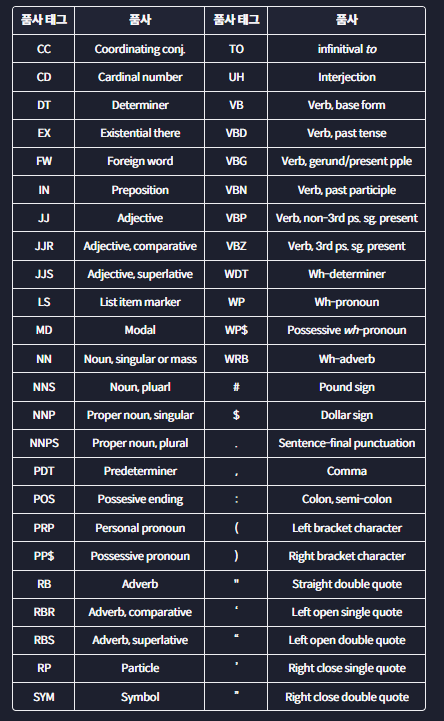

Penn Treebank POS Tag를 보면 약간의 규칙성이 보입니다. NN, NNp, NNPS처럼 N으로 시작하는 태그는 모두 명사(Noun)를 의미합니다. JJ, JJR, JJS와 같이 J로 시작하는 태그는 모두 형용사(Adjective)를 의미하죠. 이 규칙성을 이용하여 Penn Treebank POS Tag를 WordNet POS Tag의 4가지 태그로 손쉽게 바꿀 수 있습니다.

In [ ]:
from nltk.corpus import wordnet as wn

In [ ]:
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    else:
        return

그러면, penn_to_wn()을 이용해서 품사를 WordNet POS Tag로 바꾸고 표제어 추출까지 해 보겠습니다. 표제어 추출에는 NLTK의 WordNetLemmatizer 클래스에 있는 lemmatize() 함수를 사용합니다. 단어와 품사 태그를 (단어, 품사 태그) 형태로 lemmatize() 함수에 넣으면 표제어가 반환됩니다. 코드로 살펴볼게요.

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = []

for word, tag in tagged_words:
    # WordNet Pos Tag로 변환
    wn_tag = penn_to_wn(tag)

    # 품사를 기준으로 표제어 추출
    if wn_tag in (wn.NOUN, wn.ADJ, wn.ADV, wn.VERB):
        lemmatized_words.append(lemmatizer.lemmatize(word, wn_tag))
    else:
        lemmatized_words.append(word)

Penn Treebank POS Tag는 WordNet POS Tag보다 더 많은 품사를 가지고 있습니다. 때문에, wn_tag에는 WordNet POS Tag로 바뀌지 않은 일부 품사들도 있는데요. 그럴 경우에 어떤 식으로 표제어 추출을 할지가 이슈가 됩니다.

WordNet POS Tag에 포함되지 않는 품사를 가진 단어들을 그냥 제거할 수도 있고, 품사 정보 추가 없이 lemmatizer.lemmatize(word)를 바로 해주는 경우도 있습니다. 그리고, 표제어 추출을 하지 않고 원형의 단어를 그대로 사용하는 것도 방법인데요.

세 가지 방법 중 무엇을 사용해도 괜찮습니다. 다만, 분석하려는 목적과 코퍼스의 특징에 따라 더 좋은 결과가 나올 방식을 선택해서 전처리하면 됩니다. 저희는 WordNet POS Tag에 포함되지 않는 품사를 가진 단어들은 원형 그대로 사용하겠습니다.

In [ ]:
# 품사를 기준으로 표제어 추출
if wn_tag in (wn.NOUN, wn.ADJ, wn.ADV, wn.VERB):
    lemmatized_words.append(lemmatizer.lemmatize(word, wn_tag))
else:
    lemmatized_words.append(word)

In [ ]:
# 표제어 추출 확인
print('표제어 추출 전 :', tokenized_words)
print('표제어 추출 후 :', lemmatized_words)

# are이 be로, happiest가 happy로 변경됐네요. 표제어 추출이 잘 됐습니다.

표제어 추출 전 : ['You', 'are', 'the', 'happiest', 'person', '.']
표제어 추출 후 : ['You', 'be', 'the', 'happy', 'person', '.', '.']


## 6. 표제어 추출 실습

표제어 추출 함수인 words_lemmatizer() 함수를 만들어 주세요.

words_lemmatizer() 함수는 (단어, 품사) 형태로 품사 태깅이 된 리스트를 파라미터로 받고, 표제어 추출을 한 결과를 반환합니다.
Penn Treebank POS Tag를 WordNet POS Tag로 바꾸기 위한 함수 penn_to_wn()을 미리 만들어 놨습니다. preprocess.py에서 해당 함수를 불러와 사용할 수 있습니다.
WordNet POS Tag의 품사와 매칭되지 않는 경우 표제어 추출을 하지 않은 원래 단어를 결과에 추가합니다.
penn_to_wn() 함수를 사용해서 품사를 WordNet POS Tag로 바꿔 주세요.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from preprocess import pos_tagger
from preprocess import penn_to_wn
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

tokenized_sents = sent_tokenize(corpus)
pos_tagged_words = pos_tagger(tokenized_sents)

lemmatizer = WordNetLemmatizer()

# 표제어 추출 함수
def words_lemmatizer(pos_tagged_words):
    lemmatized_words = []

    # 여기에 코드를 작성하세요
    for word, tag in pos_tagged_words:
      wn_tag = penn_to_wn(tag)
      if wn_tag in (wn.NOUN, wn.ADJ, wn.ADV, wn.VERB):
        lemmatized_words.append(lemmatizer.lemmatize(word, wn_tag))
      else:
        lemmatized_words.append(word)

    return lemmatized_words

words_lemmatizer(pos_tagged_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['After',
 'read',
 'the',
 'comment',
 'for',
 'this',
 'movie',
 ',',
 'I',
 'be',
 'not',
 'sure',
 'whether',
 'I',
 'should',
 'be',
 'angry',
 ',',
 'sad',
 'or',
 'sicken',
 '.',
 'Seeing',
 'comment',
 'typical',
 'of',
 'people',
 'who',
 'a',
 ')',
 'know',
 'absolutely',
 'nothing',
 'about',
 'the',
 'military',
 'or',
 'b',
 ')',
 'who',
 'base',
 'everything',
 'they',
 'think',
 'they',
 'know',
 'on',
 'movie',
 'like',
 'this',
 'or',
 'on',
 'CNN',
 'report',
 'about',
 'Abu-Gharib',
 'make',
 'me',
 'wonder',
 'about',
 'the',
 'state',
 'of',
 'intellectual',
 'stimulation',
 'in',
 'the',
 'world',
 '.',
 'At',
 'the',
 'time',
 'I',
 'type',
 'this',
 'the',
 'number',
 'of',
 'people',
 'in',
 'the',
 'US',
 'military',
 ':',
 '1.4',
 'million',
 'on',
 'Active',
 'Duty',
 'with',
 'another',
 'almost',
 '900,000',
 'in',
 'the',
 'Guard',
 'and',
 'Reserves',
 'for',
 'a',
 'total',
 'of',
 'roughly',
 '2.3',
 'million',
 '.',
 'The',
 'number',
 'of',
 'people'

## 7. 자연어 전처리 적용 2
### 대소문자 통합
먼저 전체 코퍼스의 대소문자를 통합하겠습니다,

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

src = list(files.upload().values())[0]
open('preprocess.py','wb').write(src)

Saving preprocess.py to preprocess.py


2792

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/imdb.tsv', delimiter='\t', quoting=3)
df

,Unnamed: 0,review
0,0,"""Watching Time Chasers, it obvious that it was..."
1,1,I saw this film about 20 years ago and remembe...
2,2,"Minor Spoilers In New York, Joan Barnard (Elvi..."
3,3,I went to see this film with a great deal of e...
4,4,"""Yes, I agree with everyone on this site this ..."
5,5,"""Jennifer Ehle was sparkling in \""""Pride and P..."
6,6,Amy Poehler is a terrific comedian on Saturday...
7,7,"""A plane carrying employees of a large biotech..."
8,8,"A well made, gritty science fiction movie, it ..."
9,9,"""Incredibly dumb and utterly predictable story..."


In [ ]:
# 전체 코퍼스의 대소문자를 통합
df['review'] = df['review'].str.lower()

In [ ]:
# 문장 단위로 토큰화해 보겠습니다. df[’reviews’]의 각 코퍼스에 apply() 함수로 sent_tokenize()를 적용
df['sent_tokens'] = df['review'].apply(sent_tokenize)

In [ ]:
# 문장 단위 토큰화 확인
print(df['sent_tokens'][0])

['"watching time chasers, it obvious that it was made by a bunch of friends.', 'maybe they were sitting around one day in film school and said, \\""hey, let\'s pool our money together and make a really bad movie!\\"" or something like that.', 'what ever they said, they still ended up making a really bad movie--dull story, bad script, lame acting, poor cinematography, bottom of the barrel stock music, etc.', "all corners were cut, except the one that would have prevented this film's release.", 'life\'s like that."']


In [ ]:
# 품사 태깅
from preprocess import pos_tagger
df['pos_tagged_tokens'] = df['sent_tokens'].apply(pos_tagger)

In [ ]:
# 결과를 확인해보면 문장의 경계가 사라진 상태로 (단어, 품사)가 저장된 1차원 리스트가 확인됩니다
print(df['pos_tagged_tokens'][0])

[('``', '``'), ('watching', 'JJ'), ('time', 'NN'), ('chasers', 'NNS'), (',', ','), ('it', 'PRP'), ('obvious', 'VBZ'), ('that', 'IN'), ('it', 'PRP'), ('was', 'VBD'), ('made', 'VBN'), ('by', 'IN'), ('a', 'DT'), ('bunch', 'NN'), ('of', 'IN'), ('friends', 'NNS'), ('.', '.'), ('maybe', 'RB'), ('they', 'PRP'), ('were', 'VBD'), ('sitting', 'VBG'), ('around', 'IN'), ('one', 'CD'), ('day', 'NN'), ('in', 'IN'), ('film', 'NN'), ('school', 'NN'), ('and', 'CC'), ('said', 'VBD'), (',', ','), ('\\', 'FW'), ("''", "''"), ("''", "''"), ('hey', 'NN'), (',', ','), ('let', 'VB'), ("'s", 'POS'), ('pool', 'VB'), ('our', 'PRP$'), ('money', 'NN'), ('together', 'RB'), ('and', 'CC'), ('make', 'VB'), ('a', 'DT'), ('really', 'RB'), ('bad', 'JJ'), ('movie', 'NN'), ('!', '.'), ('\\', 'NN'), ("''", "''"), ("''", "''"), ('or', 'CC'), ('something', 'NN'), ('like', 'IN'), ('that', 'DT'), ('.', '.'), ('what', 'WP'), ('ever', 'RB'), ('they', 'PRP'), ('said', 'VBD'), (',', ','), ('they', 'PRP'), ('still', 'RB'), ('ended',

In [ ]:
# 표제어 추출 - 품사가 태그된 단어 리스트를 활용해서 표제어도 추출
from preprocess import words_lemmatizer
df['lemmatized_tokens'] = df['pos_tagged_tokens'].apply(words_lemmatizer)

In [ ]:
# 결과 확인
print(df['lemmatized_tokens'][0])

['``', 'watching', 'time', 'chaser', ',', 'it', 'obvious', 'that', 'it', 'be', 'make', 'by', 'a', 'bunch', 'of', 'friend', '.', 'maybe', 'they', 'be', 'sit', 'around', 'one', 'day', 'in', 'film', 'school', 'and', 'say', ',', '\\', "''", "''", 'hey', ',', 'let', "'s", 'pool', 'our', 'money', 'together', 'and', 'make', 'a', 'really', 'bad', 'movie', '!', '\\', "''", "''", 'or', 'something', 'like', 'that', '.', 'what', 'ever', 'they', 'say', ',', 'they', 'still', 'end', 'up', 'make', 'a', 'really', 'bad', 'movie', '--', 'dull', 'story', ',', 'bad', 'script', ',', 'lame', 'acting', ',', 'poor', 'cinematography', ',', 'bottom', 'of', 'the', 'barrel', 'stock', 'music', ',', 'etc', '.', 'all', 'corner', 'be', 'cut', ',', 'except', 'the', 'one', 'that', 'would', 'have', 'prevent', 'this', 'film', "'s", 'release', '.', 'life', "'s", 'like', 'that', '.', "''"]


In [ ]:
# 추가 전처리 - 빈도 1 이하, 단어 길이 2 이하인 단어를 제거하고, 불용어도 제거
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from collections import Counter
from preprocess import clean_by_freq
from preprocess import clean_by_len
from preprocess import clean_by_stopwords
from preprocess import stemming_by_porter
from preprocess import pos_tagger
from preprocess import words_lemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

stopwords_set = set(stopwords.words('english'))

df['cleaned_tokens'] = df['lemmatized_tokens'].apply(lambda x: clean_by_freq(x, 1)) # 빈도수가 1 이하인 단어 제거
df['cleaned_tokens'] = df['cleaned_tokens'].apply(lambda x: clean_by_len(x, 2)) # 단어 길이가 2 이하인 단어 제거
df['cleaned_tokens'] = df['cleaned_tokens'].apply(lambda x: clean_by_stopwords(x, stopwords_set)) # 불용어 제

df[['cleaned_tokens']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,cleaned_tokens
0,"[make, one, film, say, make, really, bad, movi..."
1,"[film, film]"
2,"[new, york, joan, barnard, elvire, audrey, bar..."
3,"[film, film, jump, send, n't, jump, radio, n't..."
4,"[site, movie, bad, even, movie, movie, make, m..."
5,"[ehle, northam, wonderful, wonderful, ehle, no..."
6,"[role, movie, n't, author, book, funny, author..."
7,"[plane, ceo, search, rescue, mission, call, ce..."
8,"[gritty, movie, movie, keep, sci-fi, good, kee..."
9,"[girl, girl]"


## 8. 자연어 전 처리 후 통합

각 로우에는 코퍼스를 구성하는 단어 토큰들이 저장된 리스트가 값으로 들어있네요. 해당 리스트들을 토큰 구분이 없는 하나의 코퍼스로 통합해 보겠습니다.

먼저, 토큰들을 통합하는 combine() 함수를 만들어 볼게요. 참고로 리스트의 요소들을 하나로 합칠 때에는 join() 함수를 '구분자'.join(리스트) 형태로 사용합니다. 각 단어 토큰들을 띄어쓰기로 구분하기 위해 구분자를 공백(' ')으로 하겠습니다.

In [ ]:
def combine(sentence):
    return ' '.join(sentence)

In [ ]:
# 위에서 살펴본 df['cleaned_tokens']에 combine() 함수를 적용
df['combined_corpus'] = df['cleaned_tokens'].apply(combine)

df[['combined_corpus']]

,combined_corpus
0,make one film say make really bad movie like s...
1,film film
2,new york joan barnard elvire audrey barnard jo...
3,film film jump send n't jump radio n't send re...
4,site movie bad even movie movie make movie spe...
5,ehle northam wonderful wonderful ehle northam ...
6,role movie n't author book funny author author...
7,plane ceo search rescue mission call ceo harla...
8,gritty movie movie keep sci-fi good keep suspe...
9,girl girl


## 정수 인코딩이란?
전처리된 텍스트 데이터를 컴퓨터가 분석에 활용할 수 있게 하려면 숫자 데이터로 변환해야 합니다. 이를 위한 여러 방법이 있는데요. 대표적으로 정수 인코딩이 있습니다. 정수 인코딩은 토큰화된 각 단어에 특정 정수를 맵핑하여 고유 번호로 사용하는 방법입니다.

단어 토큰에 정수 인덱스를 부여하는 방법은 다양한데요. 그 중 가장 일반적인 방법은 단어의 등장 빈도를 기준으로 정렬한 다음 인덱스를 부여하는 방식입니다.

## 정수 인코딩 하기
정수 인코딩을 하면 더 이상 추가적인 전처리를 할 수 없습니다. 때문에 모든 전처리 과정이 끝난 코퍼스를 가지고 정수 인코딩을 해야 합니다. 자연어 전처리 적용 II 레슨에서 작업한 df['cleaned_tokens']을 이용해 진행해 보겠습니다. 현재 데이터 프레임이 어떤 상태였는지 확인부터 해 볼게요.

In [ ]:
df[['cleaned_tokens']]

,cleaned_tokens
0,"[make, one, film, say, make, really, bad, movi..."
1,"[film, film]"
2,"[new, york, joan, barnard, elvire, audrey, bar..."
3,"[film, film, jump, send, n't, jump, radio, n't..."
4,"[site, movie, bad, even, movie, movie, make, m..."
5,"[ehle, northam, wonderful, wonderful, ehle, no..."
6,"[role, movie, n't, author, book, funny, author..."
7,"[plane, ceo, search, rescue, mission, call, ce..."
8,"[gritty, movie, movie, keep, sci-fi, good, kee..."
9,"[girl, girl]"


데이터 프레임의 각 로우에 정제 작업이 완료된 토큰들이 리스트 형태로 들어있습니다. 이제 이 데이터들을 정수 인코딩해 볼건데요. 먼저 한 로우부터 정수 인코딩을 적용해 보고, 그 다음에 전체 데이터 프레임에 정수 인코딩을 적용해 보겠습니다.

df['cleaned_tokens']의 5번째 로우에 있는 데이터를 가지고 정수 인코딩을 적용

In [ ]:
tokens = df['cleaned_tokens'][4]

vocab = Counter(tokens)
vocab = vocab.most_common()

print(vocab)

[('movie', 10), ('jim', 7), ('stand-up', 3), ('day', 3), ('really', 3), ('terrible', 3), ('site', 2), ('bad', 2), ('even', 2), ('make', 2), ('special', 2), ('describe', 2), ('like', 2), ('actor', 2), ('love', 2), ('stand', 2), ('comedian', 2)]


단어와 코퍼스 안에서 해당 단어의 등장 빈도가 튜플 형태로 매칭되어 리스트에 저장되었네요. 또한, 빈도수 기준으로 정렬도 잘 되어있습니다. 해당 결과를 가지고 각 단어에 인덱스를 부여해 보겠습니다.

In [ ]:
word_to_idx = {}
i = 0

for (word, frequency) in vocab:
    i = i + 1
    word_to_idx[word] = i

print(word_to_idx)

{'movie': 1, 'jim': 2, 'stand-up': 3, 'day': 4, 'really': 5, 'terrible': 6, 'site': 7, 'bad': 8, 'even': 9, 'make': 10, 'special': 11, 'describe': 12, 'like': 13, 'actor': 14, 'love': 15, 'stand': 16, 'comedian': 17}


In [ ]:
# 토큰들을 부여된 인덱스로 변환
encoded_idx = []

for token in tokens:
    idx = word_to_idx[token]
    encoded_idx.append(idx)

print(encoded_idx)

## 전체 데이터 프레임 정수 인코딩
데이터 프레임에 있는 모든 로우들로 정수 인코딩을 하려면 먼저 전체 코퍼스의 토큰들을 전부 합하여 단어의 등장 빈도를 계산해야 합니다. 그래야 정수 인덱스가 각 코퍼스에 포함된 토큰들마다 동일하게 부여될 수 있습니다.

모든 로우에 있는 토큰들을 합쳐서 빈도를 계산할 때에는 sum() 함수가 사용됩니다. sum() 함수에 모든 코퍼스들과 []를 파라미터로 넘겨 주면 하나의 합쳐진 토큰 리스트가 결과로 나옵니다.

In [ ]:
tokens = sum(df['cleaned_tokens'], [])

print(tokens)

['make', 'one', 'film', 'say', 'make', 'really', 'bad', 'movie', 'like', 'say', 'make', 'really', 'bad', 'movie', 'bad', 'one', 'film', 'like', 'film', 'film', 'new', 'york', 'joan', 'barnard', 'elvire', 'audrey', 'barnard', 'john', 'saxon', 'italy', 'etruscan', 'tomb', 'joan', 'italy', 'colleague', 'italy', 'maggot', 'maggot', 'joan', 'drug', 'drug', 'tomb', 'colleague', 'story', 'end', 'new', 'york', 'joan', 'colleague', 'romantic', 'end', 'waste', 'time', 'watch', 'story', 'romantic', 'end', 'elvire', 'audrey', 'john', 'saxon', 'maggot', 'watch', 'etrusco', 'watch', 'waste', 'time', 'etrusco', 'etruscan', 'film', 'film', 'jump', 'send', "n't", 'jump', 'radio', "n't", 'send', 'reporter', 'fear', 'jump', 'fear', 'radio', 'reporter', "n't", 'radio', "n't", "n't", 'site', 'movie', 'bad', 'even', 'movie', 'movie', 'make', 'movie', 'special', 'describe', 'movie', 'movie', 'describe', 'movie', 'jim', 'make', 'stand-up', 'day', 'stand-up', 'jim', 'like', 'jim', 'actor', 'love', 'stand', 'da

In [ ]:
# 이렇게 합쳐진 토큰 리스트로 빈도를 계산하고 많이 등장한 순으로 정렬하여 정수 인덱스를 부여

word_to_idx = {}
i = 0
tokens = sum(df['cleaned_tokens'], [])

vocab = Counter(tokens)
vocab = vocab.most_common()

for (word, frequency) in vocab:
    i = i + 1
    word_to_idx[word] = i

# 결과 확인
print(word_to_idx)

{'movie': 1, 'film': 2, "n't": 3, 'scene': 4, 'bad': 5, 'time': 6, 'reason': 7, 'make': 8, 'jim': 9, 'good': 10, 'one': 11, 'like': 12, 'could': 13, "'re": 14, 'quastel': 15, 'really': 16, 'even': 17, 'monster': 18, 'joan': 19, 'love': 20, 'author': 21, 'try': 22, 'dialogue': 23, 'idea': 24, 'italy': 25, 'colleague': 26, 'maggot': 27, 'end': 28, 'watch': 29, 'jump': 30, 'radio': 31, 'stand-up': 32, 'day': 33, 'terrible': 34, 'ehle': 35, 'northam': 36, 'search': 37, 'rescue': 38, 'call': 39, 'knowles': 40, 'henriksen': 41, 'easily': 42, 'see': 43, 'appear': 44, 'get': 45, 'character': 46, 'think': 47, 'use': 48, 'whether': 49, 'need': 50, 'though': 51, 'sci-fi': 52, 'look': 53, 'say': 54, 'new': 55, 'york': 56, 'barnard': 57, 'elvire': 58, 'audrey': 59, 'john': 60, 'saxon': 61, 'etruscan': 62, 'tomb': 63, 'drug': 64, 'story': 65, 'romantic': 66, 'waste': 67, 'etrusco': 68, 'send': 69, 'reporter': 70, 'fear': 71, 'site': 72, 'special': 73, 'describe': 74, 'actor': 75, 'stand': 76, 'comed

이제 만들어진 정수 인덱스를 가지고 데이터 프레임의 각 로우에 있는 토큰들을 정수 인코딩해 주겠습니다. 해당 작업을 해주는 함수 idx_encoder()를 만들어서 apply() 함수로 전체 데이터 프레임에 적용해 보겠습니다.

In [ ]:
def idx_encoder(tokens, word_to_idx):
    encoded_idx = []

    for token in tokens:
        idx = word_to_idx[token]
        encoded_idx.append(idx)

    return encoded_idx

df['integer_encoded'] = df['cleaned_tokens'].apply(lambda x: idx_encoder(x, word_to_idx))
df[['integer_encoded']]

,integer_encoded
0,"[8, 11, 2, 54, 8, 16, 5, 1, 12, 54, 8, 16, 5, ..."
1,"[2, 2]"
2,"[55, 56, 19, 57, 58, 59, 57, 60, 61, 25, 62, 6..."
3,"[2, 2, 30, 69, 3, 30, 31, 3, 69, 70, 71, 30, 7..."
4,"[72, 1, 5, 17, 1, 1, 8, 1, 73, 74, 1, 1, 74, 1..."
5,"[35, 36, 78, 78, 35, 36, 79, 79, 35, 36]"
6,"[80, 1, 3, 21, 81, 82, 21, 21, 80, 3, 82, 83, ..."
7,"[85, 86, 37, 38, 87, 39, 86, 88, 40, 89, 41, 9..."
8,"[120, 1, 1, 121, 52, 10, 121, 122, 53, 1, 52, ..."
9,"[123, 123]"


## 2. 정수 인코딩 실습
실습 설명
코퍼스에 포함된 단어 토큰의 등장 빈도 기준으로 정수 인덱스를 생성하고, 모든 토큰들을 정수 인덱스로 변환해 주세요.

- 주어진 코퍼스의 단어별 등장 빈도를 계산하고, 많이 등장한 단어순으로 정렬해 주세요.
- 빈도수 기준으로 정렬한 단어들에 인덱스를 부여해 주세요.
- 부여된 정수 인덱스를 기준으로 모든 토큰들을 정수 인코딩해 주세요.

In [ ]:
# 필요한 패키지와 함수 불러오기
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')

word_to_idx = {} # 단어 별 인덱스 부여하기 위한 딕셔너리
i = 0
encoded_idx = [] # 각 토큰의 정수 인덱스를 부여하기 위한 리스트

tokenized_words = word_tokenize(corpus)

# 단어의 빈도수를 계산하여 정렬하는 코드를 작성하세요
vocab = Counter(tokenized_words)
vocab = vocab.most_common()

for (word, frequency) in vocab:
    i = i + 1
    word_to_idx[word] = i

for word in tokenized_words:
    idx = word_to_idx[word]
    encoded_idx.append(idx)

# 테스트 코드
encoded_idx

## 3. 패딩 (Padding)

예를 들어서, 아래와 같은 문장들이 있다고 가정해 볼게요.

I love you
You are so lovely
I am loving you now
각 문장을 전처리 한 후에, 단어들을 등장 빈도로 정수 인코딩을 하게 되면 어떻게 될까요?

각 문장들은 길이와 토큰의 수가 다 다르기 때문에 인코딩된 정수의 개수도 서로 다르겠죠. 'I love you'는 3개, 'You are so lovely'는 4개, 'I am loving you now'에는 5개의 정수 인덱스가 포함될 겁니다.

그런데 만약에, 각 문장의 토큰 수가 모두 같다면 정수 인코딩 결과는 하나의 행렬로 만들 수 있을 겁니다. 위의 예시와 다르게 3개의 문장 전부 단어 토큰 수가 5개였다면 3*5 행렬이 만들어지겠죠.

그리고 데이터를 행렬로 만들면, 컴퓨터는 많은 데이터를 한 번에 묶어서 처리할 수 있습니다. 그러면 좀 더 복잡한 연산을 쉽게 처리하는게 가능해집니다. 때문에 각기 다른 문장의 길이를 서로 맞춰서 행렬 형태로 만드는게 필요한데요. 그 과정을 패딩이라고 합니다.

## 제로 패딩(Zero Padding)
패딩을 하는 방법은 여러가지인데요. 대표적으로 제로 패딩이 있습니다. 제로 패딩은 정수 인코딩을 한 문장 중 가장 긴 문장의 길이를 구하고, 길이가 짧은 문장에 숫자 0을 채워서 가장 긴 문장과 길이를 맞추는 방법입니다.

앞에서 정수 인코딩 작업을 할 때 빈도수에 따라 정수 인덱스를 1부터 부여했었죠? 때문에 정수 0은 아무 의미를 갖고 있지 않고, 컴퓨터는 해당 인덱스를 무시하게 됩니다.

앞에서 정수 인코딩을 했던 df['integer_encoded']를 활용해 제로 패딩을 한번 해 보겠습니다. 먼저 토큰을 가장 많이 가지고 있는 코퍼스에 몇개의 토큰이 있는지를 확인해 볼게요

In [ ]:
max_len = max(len(item) for item in df['integer_encoded'])

print('토큰의 최대 개수:', max_len)

토큰의 최대 개수: 200


In [ ]:
# 토큰이 가장 많은 코퍼스는 200개의 토큰으로 구성되어 있습니다. 이제, 다른 모든 코퍼스들의 길이가 200이 되도록 0을 채워 넣어 주겠습니다.
for tokens in df['integer_encoded']:
    while len(tokens) < max_len:
        tokens.append(0)

df[['integer_encoded']]

,integer_encoded
0,"[8, 11, 2, 54, 8, 16, 5, 1, 12, 54, 8, 16, 5, ..."
1,"[2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[55, 56, 19, 57, 58, 59, 57, 60, 61, 25, 62, 6..."
3,"[2, 2, 30, 69, 3, 30, 31, 3, 69, 70, 71, 30, 7..."
4,"[72, 1, 5, 17, 1, 1, 8, 1, 73, 74, 1, 1, 74, 1..."
5,"[35, 36, 78, 78, 35, 36, 79, 79, 35, 36, 0, 0,..."
6,"[80, 1, 3, 21, 81, 82, 21, 21, 80, 3, 82, 83, ..."
7,"[85, 86, 37, 38, 87, 39, 86, 88, 40, 89, 41, 9..."
8,"[120, 1, 1, 121, 52, 10, 121, 122, 53, 1, 52, ..."
9,"[123, 123, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
